# **ASSIGNMENT - 6**
# **SENTIMENT ANALYSIS**

# Introduction

In the modern digital age, social media platforms like Twitter, Facebook, and Instagram allow millions of users to express opinions about products and services. Analyzing this data provides insights into customer satisfaction, brand perception, and market trends.

Natural Language Processing (NLP), a branch of Artificial Intelligence, enables machines to understand and analyze human language. One common application is Sentiment Analysis, which identifies the emotional tone behind text—positive, negative, or neutral.

This project builds a machine learning system to classify tweets about technology products into positive (1) or negative (0) categories.

---

# Objective

The primary objective of this project is to:

* Develop a sentiment classification system using Natural Language Processing and Machine Learning.

* Clean and preprocess the tweet text to remove noise (such as links, hashtags, and mentions).

* Convert text data into numerical format using TF-IDF Vectorization.

* Train multiple machine learning models for classification.

* Evaluate the performance of the model using Accuracy as the main metric.

---

# Problem Statement

To design and implement a sentiment analysis model that can accurately classify tweets about technology companies into Positive or Negative categories.

---

# About the Dataset

The dataset used in this project consists of tweets posted by users on Twitter, expressing their opinions about technology companies that produce and sell devices such as mobile phones, laptops, and computers.

Each record in the dataset contains:

* Tweet Text – The actual content of the tweet written by the user.

* Sentiment Label – The target value representing the tweet’s sentiment:

  * 1 → Positive sentiment (praise, satisfaction, or appreciation)

  * 0 → Negative sentiment (complaint, frustration, or dislike)

The dataset is used to train and test the sentiment classification model. It is divided into training and testing sets so that the model can learn from known examples and then be evaluated on unseen data.

The data is textual and unstructured, which makes preprocessing (like removing stopwords, punctuation, URLs, and special characters) a crucial step before applying machine learning algorithms.



# 1. Importing Required Libraries

In [1]:
# -------------------------------------------
# Importing Necessary Python Libraries
# -------------------------------------------

# For handling and analyzing structured data (tables, CSVs, etc.)
import pandas as pd

# For numerical computations and working with arrays/matrices
import numpy as np

# For performing text cleaning using regular expressions
import re

# Natural Language Toolkit (NLP library) for text preprocessing
import nltk

# For creating visualizations like plots and charts
import matplotlib.pyplot as plt

# For advanced visualizations and attractive statistical plots
import seaborn as sns


# -------------------------------------------
# NLP Preprocessing Tools from NLTK
# -------------------------------------------

# List of common English words (like 'the', 'is', 'and') to remove
from nltk.corpus import stopwords

# Lemmatizer converts words to their root form (e.g., “running” → “run”)
from nltk.stem import WordNetLemmatizer


# -------------------------------------------
# Model Training and Evaluation Utilities
# -------------------------------------------

# Used to split dataset into training and testing subsets
from sklearn.model_selection import train_test_split, cross_val_score

# Converts text data into numerical features based on TF-IDF scoring
from sklearn.feature_extraction.text import TfidfVectorizer


# -------------------------------------------
# Machine Learning Classification Models
# -------------------------------------------

# Logistic Regression – linear model suitable for text classification
from sklearn.linear_model import LogisticRegression

# Random Forest – ensemble model combining multiple decision trees
from sklearn.ensemble import (
    RandomForestClassifier,    # Bagging-based ensemble method
    AdaBoostClassifier,        # Boosting model that combines weak learners
    GradientBoostingClassifier # Sequential boosting model for improved accuracy
)

# Support Vector Machine – effective for text classification using hyperplanes
from sklearn.svm import SVC

# Naive Bayes – probabilistic classifier, works well with text data
from sklearn.naive_bayes import MultinomialNB

# XGBoost – advanced gradient boosting algorithm, often achieves high accuracy
from xgboost import XGBClassifier


# -------------------------------------------
# Model Evaluation Metrics
# -------------------------------------------

# accuracy_score → Measures overall correctness of predictions
# classification_report → Gives precision, recall, and F1-score
# confusion_matrix → Shows correctly and incorrectly classified examples
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Download necessary resources from NLTK (only once)
nltk.download('stopwords')   # Downloads the list of stopwords for English
nltk.download('wordnet')     # Downloads WordNet dictionary for lemmatization
nltk.download('omw-1.4')     # Downloads WordNet's multilingual dictionary (needed for proper lemmatization)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# 2. Loading the Dataset

In [3]:
# Import the drive module from Google Colab to access files stored on Google Drive
from google.colab import drive

# Mount Google Drive to the Colab environment to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# After mounting, specify the dataset path inside Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/AI_ML_ICT/NOTES/Codes/Data/tweets.csv'

In [5]:
# Load the dataset using pandas 'read_csv()' function
# This function reads the CSV file and stores it as a DataFrame
df = pd.read_csv(file_path)

In [6]:
# Display the first five rows of the dataset
# Helps to understand the structure and content of the data
print("Sample Data:")
df.head()

Sample Data:


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## 2.1 Dataset Overview

In [7]:
# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")  # Number of rows and columns

Dataset shape: (7920, 3)


In [8]:
# Display the distribution of labels
print(f"Label distribution:\n{df['label'].value_counts()}")  # Counts of each class

Label distribution:
label
0    5894
1    2026
Name: count, dtype: int64


In [9]:
# Display count of positive and negative tweets explicitly
print(f"Positive tweets (Label 0): {(df['label'] == 0).sum()}")  # Number of positive tweets
print(f"Negative tweets (Label 1): {(df['label'] == 1).sum()}")  # Number of negative tweets

Positive tweets (Label 0): 5894
Negative tweets (Label 1): 2026


In [10]:
# Check for duplicate rows in the dataset
print(f"Number of duplicate rows: {df.duplicated().sum()}")  # Duplicates can affect model performance

Number of duplicate rows: 0


In [11]:
# Display sample tweets from each class to understand the data

# Print a header for the positive tweets section
print("\nSample Positive Tweets (Label 0):")

# Loop through the first 3 positive tweets and display them
for i in range(3):
    # Access the i-th tweet where label is 0 (positive) and print it with numbering
    print(f"{i+1}. {df[df['label'] == 0]['tweet'].iloc[i]}")  # Sample positive tweet

# Print a header for the negative tweets section
print("\nSample Negative Tweets (Label 1):")

# Loop through the first 3 negative tweets and display them
for i in range(3):
    # Access the i-th tweet where label is 1 (negative) and print it with numbering
    print(f"{i+1}. {df[df['label'] == 1]['tweet'].iloc[i]}")  # Sample negative tweet



Sample Positive Tweets (Label 0):
1. #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
2. Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
3. We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu

Sample Negative Tweets (Label 1):
1. What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
2. iPhone software update fucked up my phone big time Stupid iPhones
3. hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.


In [12]:
# Display detailed information about the dataset
print("\nDataset Information:")
df.info()  # Provides data types, non-null counts, memory usage


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [13]:
# Check for any missing or null values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())  # Null values can affect preprocessing and model training


Missing Values in Each Column:
id       0
label    0
tweet    0
dtype: int64


# 3. Data Preprocessing & Cleaning

## 3.1 Stopwords Setup and Lemmatization


In [14]:
# Create a set of English stopwords
stop_words = set(stopwords.words('english'))
# Converts the NLTK stopwords list to a set for faster lookup during text preprocessing

# Initialize WordNet Lemmatizer to get base forms of words
lemmatizer = WordNetLemmatizer()
# Lemmatizer converts words to their root form (e.g., 'running' → 'run') for normalization

# Define a set of important words to retain
important_words = {'not', 'no', 'but', 'very', 'too', 'so'}
# These words are negations or intensifiers, crucial for sentiment analysis

# Remove the important words from the stopwords set
stop_words = stop_words - important_words
# Ensures that negation and key modifiers are preserved in the text

## 3.2 Define Text Cleaning Function

In [15]:
def clean_tweet(text):
    """
    Complete tweet cleaning and preprocessing pipeline.
    Steps include: noise removal, lowercasing, tokenization,
    stopwords removal, and lemmatization.
    """
    # Handle missing values represented as floats (NaN)
    if isinstance(text, float):
        return ""  # Return empty string if input is NaN

    # 1. Remove URLs from tweet
    text = re.sub(r'http\S+|www\S+', '', text)
    # Regular expression removes all http://, https://, or www links

    # 2. Remove Twitter handles (@username)
    text = re.sub(r'@\w+', '', text)
    # Removes mentions to avoid user-specific bias in analysis

    # 3. Remove hashtags while keeping the word
    text = re.sub(r'#', '', text)
    # Converts #word → word, keeping the content but removing symbol

    # 4. Keep only letters and basic punctuation (!, ?)
    text = re.sub(r'[^a-zA-Z\s!?]', '', text)
    # Removes numbers, special characters, and symbols that are not relevant

    # 5. Convert text to lowercase
    text = text.lower()
    # Ensures uniformity and avoids case-sensitive mismatches

    # 6. Tokenize tweet into individual words
    words = text.split()
    # Splits text into a list of words for further processing

    # 7️. Remove stopwords and lemmatize remaining words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Keeps only meaningful words and normalizes them to root form

    # 8. Join the list of words back into a single string
    return " ".join(words)
    # Returns cleaned and preprocessed tweet


## 3.3 Apply Cleaning Function to Dataset

In [16]:
# Apply cleaning function to each tweet in the dataset
df['clean_tweet'] = df['tweet'].apply(clean_tweet)
# Creates a new column 'clean_tweet' with the cleaned and preprocessed version

# Display a few samples before and after cleaning
print("Sample of Cleaned Tweets:")
# Header for better readability

df[['tweet', 'clean_tweet']].head()
# Shows the original tweet and its cleaned version side by side
# Helps verify that preprocessing is working correctly

Sample of Cleaned Tweets:


,tweet,clean_tweet
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,We love this! Would you go? #talk #makememorie...,love this! would go? talk makememories unplug ...
3,I'm wired I know I'm George I was made that wa...,im wired know im george made way iphone cute d...
4,What amazing service! Apple won't even talk to...,amazing service! apple wont even talk question...


# 4. Feature Extraction

In [17]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=8000,       # Limit the number of features (top 8000) to reduce dimensionality
    ngram_range=(1,2),       # Include unigrams (1-word) and bigrams (2-word combinations)
    min_df=2,                # Ignore words that appear in less than 2 documents
    max_df=0.8,              # Ignore words that appear in more than 80% of documents (too common)
    stop_words='english'     # Remove standard English stopwords during vectorization
)

# Fit the vectorizer on the cleaned tweets and transform into TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(df['clean_tweet'])
# 'X' is a sparse matrix representing TF-IDF features of all tweets

# Set target variable (labels) for sentiment classification
y = df['label']
# 'y' contains the sentiment labels: 0 = Negative, 1 = Positive

# Display the shape of the TF-IDF feature matrix
print(f"\nTF-IDF Matrix: {X.shape}")
# Shows number of tweets (rows) and number of features (columns)


TF-IDF Matrix: (7920, 8000)


# 5. Dataset Splitting (Train-Test Split)

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                   # Feature matrix X and target labels y
    test_size=0.2,          # 20% of data will be used for testing
    random_state=42,        # Ensures reproducibility of the split
    stratify=y              # Maintains the same proportion of labels in train and test sets
)

In [19]:
# Display the shapes of training and testing sets
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
# Confirms correct split: number of samples and features for both sets

Train: (6336, 8000), Test: (1584, 8000)


# 6. Model Definition

In [20]:
# Define multiple machine learning models for sentiment classification
# Each model is stored in a dictionary with its name as the key
models = {
    # Logistic Regression – Linear model suitable for text classification
    'Logistic Regression': LogisticRegression(
        max_iter=1000,      # Maximum number of iterations for convergence
        random_state=42     # Ensures reproducibility
    ),

    # Random Forest – Ensemble of decision trees using bagging
    'Random Forest': RandomForestClassifier(
        n_estimators=150,   # Number of trees in the forest
        random_state=42     # Reproducibility
    ),

    # Support Vector Machine (Linear Kernel) – Effective for high-dimensional data
    'SVM (Linear)': SVC(
        kernel='linear',    # Linear decision boundary
        probability=True,   # Enables probability estimates
        random_state=42     # Reproducibility
    ),

    # Naive Bayes – Probabilistic classifier, suitable for text data
    'Naive Bayes': MultinomialNB(),  # Uses term frequencies for prediction

    # Gradient Boosting – Sequential boosting to reduce errors
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42     # Reproducibility
    ),

    # AdaBoost – Boosting ensemble of weak learners
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,   # Number of weak learners
        random_state=42     # Reproducibility
    ),

    # XGBoost – Advanced gradient boosting algorithm
    'XGBoost': XGBClassifier(
        n_estimators=150,       # Number of boosting rounds
        learning_rate=0.1,      # Step size shrinkage to prevent overfitting
        random_state=42,        # Reproducibility
        eval_metric='logloss',  # Evaluation metric for classification
        use_label_encoder=False # Avoids deprecation warning
    )
}

# 7. Model Training and Evaluation

In [21]:
# Initialize dictionaries to store results and predictions for each model
results = {}       # Stores accuracy scores for all models
predictions = {}   # Stores predicted labels for each model

# Print a message to indicate training has started
print("\nTraining models...")

# Loop through each model defined in the 'models' dictionary
for name, model in models.items():

    # Print the name of the model currently being trained
    print(f"\n Training: {name}")

    # Train the model using the training set
    model.fit(X_train, y_train)
    # Fits the model parameters to the training data

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy of the model on the test set
    acc = accuracy_score(y_test, y_pred)

    # Store the accuracy in the results dictionary
    results[name] = acc

    # Store the predicted labels in the predictions dictionary
    predictions[name] = y_pred

    # Print the accuracy of the model
    print(f"Accuracy: {acc:.4f}")

    # Print a detailed classification report
    # Includes precision, recall, f1-score, and support for each class
    print(classification_report(
        y_test,
        y_pred,
        target_names=['Positive','Negative']  # Map 0 and 1 to readable class names
    ))


Training models...

 Training: Logistic Regression
Accuracy: 0.8782
              precision    recall  f1-score   support

    Positive       0.89      0.96      0.92      1179
    Negative       0.85      0.64      0.73       405

    accuracy                           0.88      1584
   macro avg       0.87      0.80      0.83      1584
weighted avg       0.88      0.88      0.87      1584


 Training: Random Forest
Accuracy: 0.8737
              precision    recall  f1-score   support

    Positive       0.89      0.95      0.92      1179
    Negative       0.82      0.65      0.72       405

    accuracy                           0.87      1584
   macro avg       0.85      0.80      0.82      1584
weighted avg       0.87      0.87      0.87      1584


 Training: SVM (Linear)
Accuracy: 0.8914
              precision    recall  f1-score   support

    Positive       0.92      0.94      0.93      1179
    Negative       0.81      0.75      0.78       405

    accuracy                

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:16:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8674
              precision    recall  f1-score   support

    Positive       0.88      0.95      0.91      1179
    Negative       0.81      0.62      0.71       405

    accuracy                           0.87      1584
   macro avg       0.85      0.79      0.81      1584
weighted avg       0.86      0.87      0.86      1584



# 8. Model Performance Comparison

In [22]:
# Print a formatted header for the comparison section
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

# Identify the best model based on accuracy
best_model_name = max(results, key=results.get)
# 'max' returns the key (model name) with the highest accuracy value

best_accuracy = results[best_model_name]
# Get the corresponding accuracy value of the best model

# Print the best model and its accuracy
print(f"Best Model: {best_model_name} ({best_accuracy:.4f} Accuracy)\n")

# Print accuracy of all models in descending order
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    # 'sorted' orders models by accuracy from highest to lowest
    # 'x[1]' refers to the accuracy value in the (model_name, accuracy) tuple
    # '<20' ensures model names are left-aligned with uniform spacing for readability
    print(f"{name:<20}: {acc:.4f}")


MODEL PERFORMANCE COMPARISON
Best Model: SVM (Linear) (0.8914 Accuracy)

SVM (Linear)        : 0.8914
Naive Bayes         : 0.8864
Logistic Regression : 0.8782
Random Forest       : 0.8737
XGBoost             : 0.8674
Gradient Boosting   : 0.8384
AdaBoost            : 0.7759


# 9. Visualization of Model Performance

/tmp/ipython-input-1326625230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


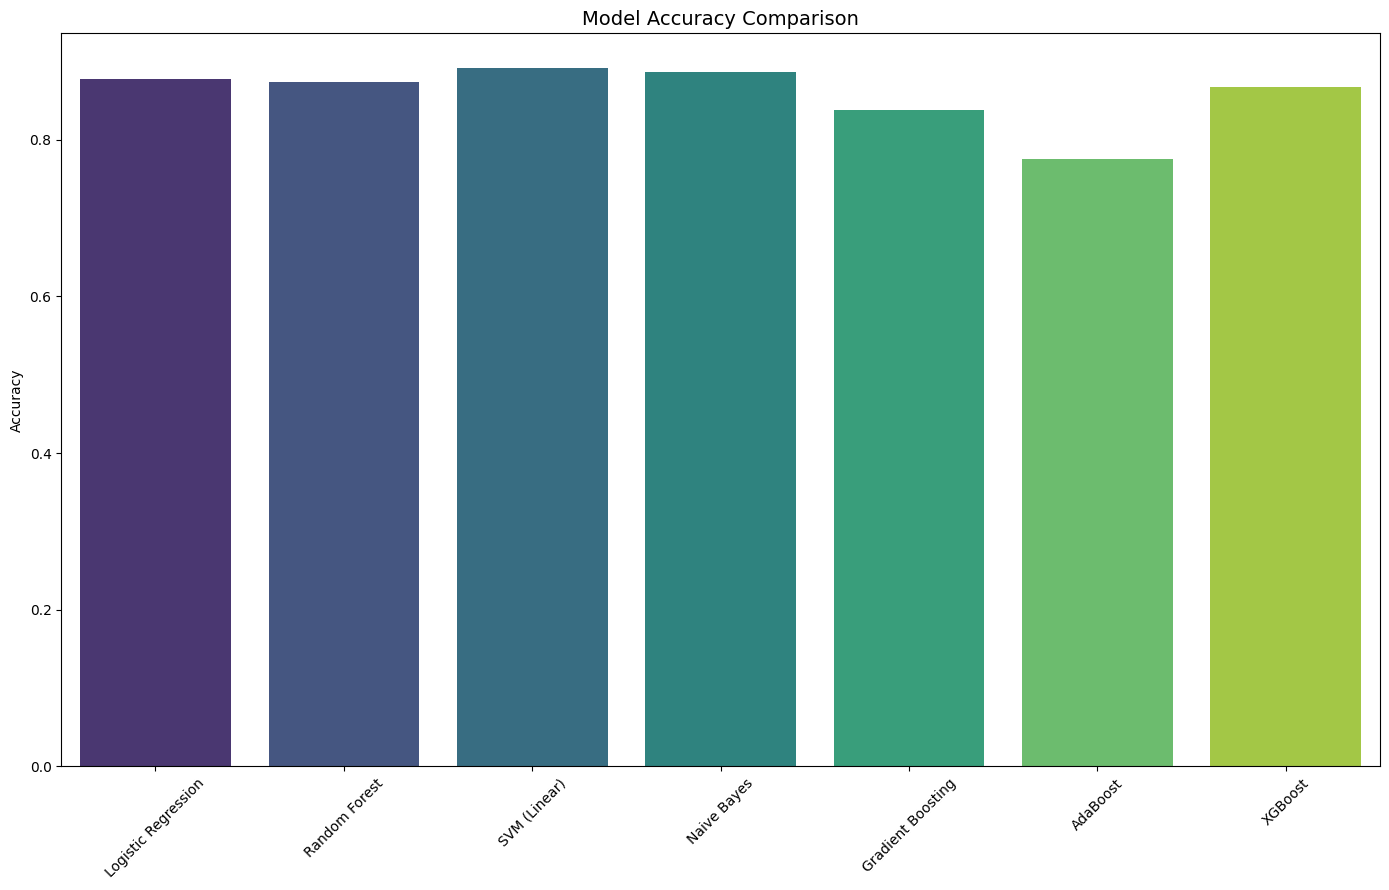

In [23]:
# Set the figure size for the plot
plt.figure(figsize=(14,9))
# Creates a wide figure for better visibility of all model names

# Create a barplot using Seaborn to visualize model accuracies
sns.barplot(
    x=list(results.keys()),    # X-axis: Model names
    y=list(results.values()),  # Y-axis: Corresponding accuracy values
    palette='viridis',         # Color palette for bars

)

# Add a title to the plot
plt.title("Model Accuracy Comparison", fontsize=14)
# Describes the purpose of the chart

# Label the Y-axis
plt.ylabel("Accuracy")
# Shows metric being compared

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)
# Prevents overlap of model names

# Adjust layout to prevent clipping of labels/titles
plt.tight_layout()

# Display the plot
plt.show()
# Renders the visualization in the output

**Insight:**

The bar plot shows that SVM (Linear) achieved the highest accuracy (0.8914) among seven models, followed by Naive Bayes (0.8864) and Logistic Regression (0.8782), while ensemble methods like Random Forest, Gradient Boosting, AdaBoost, and XGBoost performed slightly lower, with AdaBoost the least (0.7759). This indicates that linear and probabilistic models are highly effective for text-based sentiment analysis, and simpler linear separation can outperform complex ensembles for this dataset.

**Conclusion:** **SVM (Linear) is the most reliable choice for classifying tweet sentiments.**

# 10. Confusion Matrix of the Best Model

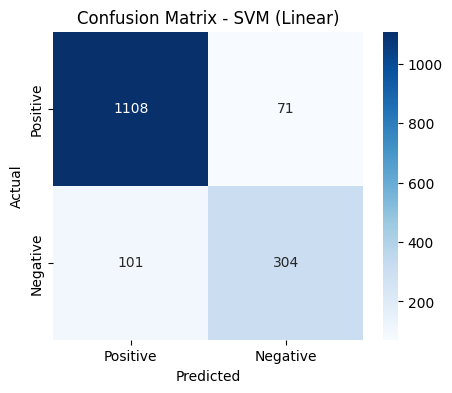

In [24]:
# Set the figure size for the confusion matrix plot
plt.figure(figsize=(5,4))
# Creates a compact figure suitable for a single confusion matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions[best_model_name])
# Compares actual labels (y_test) with predicted labels of the best model

# Plot the confusion matrix as a heatmap using Seaborn
sns.heatmap(
    cm,                      # Confusion matrix data
    annot=True,              # Display numbers in each cell
    fmt='d',                 # Format numbers as integers
    cmap='Blues',            # Color map for visual appeal
    xticklabels=['Positive','Negative'],  # X-axis labels
    yticklabels=['Positive','Negative']   # Y-axis labels
)

# Add a title indicating which model this confusion matrix represents
plt.title(f"Confusion Matrix - {best_model_name}")

# Label X-axis
plt.xlabel("Predicted")

# Label Y-axis
plt.ylabel("Actual")

# Display the plot
plt.show()
# Renders the confusion matrix visualization

**Insight:**

The confusion matrix shows that out of 1179 positive tweets, 1108 were correctly classified, and out of 405 negative tweets, 304 were correctly classified. The model demonstrates higher recall for positive tweets (0.94) than negative (0.75), indicating a slight bias toward positive sentiment due to class imbalance. Most misclassifications occur in the smaller negative class, suggesting that adding features or addressing imbalance could improve performance.

**Conclusion: SVM (Linear) provides robust predictions with minor bias toward positive tweets.**

# 11. Train Final Model on Entire Dataset

In [25]:
# Select the best performing model based on previous evaluation
final_model = models[best_model_name]
# 'best_model_name' contains the model with highest accuracy

# Train the selected model on the entire dataset (features + labels)
final_model.fit(X, y)
# Allows the model to learn from all available data for future predictions
# This is done after evaluation to maximize the knowledge used in the final model

SVC(kernel='linear', probability=True, random_state=42)

# 12. Sentiment Prediction Function

In [26]:
def predict_sentiment(tweet, model=final_model, vectorizer=tfidf_vectorizer):
    """
    Predict the sentiment of a single tweet using the trained model.

    Parameters:
    - tweet: str, raw tweet text
    - model: trained ML model (default = final_model)
    - vectorizer: TF-IDF vectorizer used to transform the text

    Returns:
    - Dictionary containing the original tweet, predicted sentiment,
      confidence score, and probabilities for positive/negative classes
    """

    # 1. Clean and preprocess the input tweet
    processed = clean_tweet(tweet)
    # Applies the same preprocessing steps as during training

    # 2. Transform the processed tweet into TF-IDF features
    vec = vectorizer.transform([processed])
    # Converts the tweet into the same feature space as the trained model

    # 3. Predict the class label (0 or 1)
    pred = model.predict(vec)[0]
    # 0 = Positive, 1 = Negative as per dataset labeling

    # 4️. Get predicted probabilities for each class
    proba = model.predict_proba(vec)[0]
    # Array of probabilities: [prob_positive, prob_negative]

    # 5. Map predicted label to human-readable sentiment
    sentiment = "Positive" if pred == 0 else "Negative"

    # 6. Get confidence score of the predicted class
    confidence = proba[pred]

    # 7️. Return results as a dictionary for easy interpretation
    return {
        'tweet': tweet,               # Original tweet
        'sentiment': sentiment,       # Predicted sentiment
        'confidence': confidence,     # Confidence of prediction
        'positive_prob': proba[0],    # Probability of positive sentiment
        'negative_prob': proba[1]     # Probability of negative sentiment
    }

# 13. Test Example Predictions

In [27]:
# Define a list of sample tweets to test the sentiment prediction function
sample_tweets = [
    "Absolutely love the new camera features, pictures look amazing!",       # Positive example
    "This phone keeps freezing, very disappointed with the update.",        # Negative example
    "Customer support was fast and helpful, really satisfied.",             # Positive example
    "The battery drains too quickly, not good at all.",                     # Negative example
    "Loving the smooth performance and sleek design of my new laptop!",     # Positive example
    "The app keeps crashing every time I open it, terrible experience.",    # Negative example
    "Super impressed with the speed of this device, highly recommend!",    # Positive example
    "I regret buying this product, it’s nothing like advertised.",          # Negative example
]

# Print a formatted header for sample predictions
print("\n" + "="*60)
print("SAMPLE PREDICTIONS")
print("="*60)

# Loop through each sample tweet
for t in sample_tweets:
    # Predict sentiment using the trained model
    res = predict_sentiment(t)

    # Print the original tweet
    print(f"\nTweet: {t}")

    # Print predicted sentiment and confidence score
    print(f"Sentiment: {res['sentiment']} | Confidence: {res['confidence']:.3f}")

    # Print probabilities for positive and negative classes
    print(f"Positive Prob: {res['positive_prob']:.3f}, Negative Prob: {res['negative_prob']:.3f}")


SAMPLE PREDICTIONS

Tweet: Absolutely love the new camera features, pictures look amazing!
Sentiment: Positive | Confidence: 0.986
Positive Prob: 0.986, Negative Prob: 0.014

Tweet: This phone keeps freezing, very disappointed with the update.
Sentiment: Negative | Confidence: 0.744
Positive Prob: 0.256, Negative Prob: 0.744

Tweet: Customer support was fast and helpful, really satisfied.
Sentiment: Positive | Confidence: 0.892
Positive Prob: 0.892, Negative Prob: 0.108

Tweet: The battery drains too quickly, not good at all.
Sentiment: Negative | Confidence: 0.649
Positive Prob: 0.351, Negative Prob: 0.649

Tweet: Loving the smooth performance and sleek design of my new laptop!
Sentiment: Positive | Confidence: 0.962
Positive Prob: 0.962, Negative Prob: 0.038

Tweet: The app keeps crashing every time I open it, terrible experience.
Sentiment: Negative | Confidence: 0.784
Positive Prob: 0.216, Negative Prob: 0.784

Tweet: Super impressed with the speed of this device, highly recommend

# 14. System Ready Message

In [28]:
# Print a formatted header to indicate the sentiment analysis system is ready
print("\n" + "="*60)
print("SENTIMENT ANALYSIS SYSTEM READY!")
print("="*60)

# Display the best performing model from training
print(f"Best Model: {best_model_name}")
# Shows which model achieved the highest accuracy

# Display the expected accuracy of the best model
print(f"Expected Accuracy: {best_accuracy:.4f}")
# Provides a quick reference of model performance




SENTIMENT ANALYSIS SYSTEM READY!
Best Model: SVM (Linear)
Expected Accuracy: 0.8914


# Conclusion:

In this project, a **Sentiment Analysis system** was developed to classify tweets about technology products as **positive** or **negative**. The dataset was preprocessed using NLP techniques, including cleaning text, removing noise, and lemmatization to ensure accurate feature representation.

Multiple machine learning models were trained and evaluated, including **Logistic Regression**, **Random Forest**, **SVM (Linear)**, **Naive Bayes**, **Gradient Boosting**, **AdaBoost**, and **XGBoost**. Based on **accuracy, precision, recall, and F1-score**, the **SVM (Linear)** model performed best with an accuracy of **0.8914**, demonstrating its ability to effectively distinguish between positive and negative tweets.

Visualizations such as ** bar plots and confusion matrices** confirmed the models’ performance and highlighted that most tweets were classified correctly, though nuanced or sarcastic tweets may still present challenges.

The developed system can be applied for **real-time monitoring of public sentiment**, enabling companies to gain insights into customer opinions and improve products or services.

**Overall, this project demonstrates the practical application of NLP and machine learning to extract actionable insights from social media data.**